In [1]:
### Loading the Data into Google Colab 
import seaborn as sns
import pandas as pd
from google.colab import drive
drive.mount("mnt")
%cd "mnt/My Drive/Colab Notebooks/DICProject"

Mounted at mnt
/content/mnt/My Drive/Colab Notebooks/DICProject


In [21]:
import matplotlib.pyplot as plt

In [2]:
### Reading the CSV dataset using Pandas and displaying the original number of rows and columns
df=pd.read_csv('2008.csv')
df_2007=pd.read_csv('2007.csv')
print ("2008 CSV file details - ",df.shape)
print ("2007 CSV file detials - ",df_2007.shape)
df = df.append(df_2007,ignore_index=True)
print ("Total dataframe details - ",df.shape)

2008 CSV file details -  (2389217, 29)
2007 CSV file detials -  (7453215, 29)
Total dataframe details -  (9842432, 29)


In [3]:
### Removing Duplicated records in the CSV file and displaying the number of rows and columns - Datacleaning Step1
deduplicate_df = df.drop_duplicates(keep='first')
deduplicate_df.shape

(9842401, 29)

In [4]:
### Subsampling data to get data from only 2008 - Datacleaning Step2
deduplicate_df = deduplicate_df.loc[deduplicate_df['Year']==2008]
deduplicate_df.shape

(2389213, 29)

In [5]:
### Checking for Columns that have NaN values - EDA Step1
for col in deduplicate_df.keys():
  print (col)
  print (deduplicate_df[col].isnull().sum())

Year
0
Month
0
DayofMonth
0
DayOfWeek
0
DepTime
64442
CRSDepTime
0
ArrTime
70096
CRSArrTime
0
UniqueCarrier
0
FlightNum
0
TailNum
42452
ActualElapsedTime
70096
CRSElapsedTime
407
AirTime
70096
ArrDelay
70096
DepDelay
64442
Origin
0
Dest
0
Distance
0
TaxiIn
70096
TaxiOut
64442
Cancelled
0
CancellationCode
2324771
Diverted
0
CarrierDelay
1804632
WeatherDelay
1804632
NASDelay
1804632
SecurityDelay
1804632
LateAircraftDelay
1804632


In [6]:
### Filling Nan Values with 0 for some of the columns - Datacleaning Step 3
deduplicate_df['WeatherDelay'] = deduplicate_df['WeatherDelay'].fillna(0)
deduplicate_df['CarrierDelay'] = deduplicate_df['CarrierDelay'].fillna(0)
deduplicate_df['NASDelay'] = deduplicate_df['NASDelay'].fillna(0)
deduplicate_df['LateAircraftDelay']=deduplicate_df['LateAircraftDelay'].fillna(0)
deduplicate_df['SecurityDelay'] = deduplicate_df['SecurityDelay'].fillna(0)
deduplicate_df['ArrDelay'] = deduplicate_df['ArrDelay'].fillna(0)

In [7]:
### Checking if Cancelled Flights have an impact in the flight Delay or ArrDelay - EDA Step -2
Cancelled_df = deduplicate_df.loc[deduplicate_df['Cancelled']==1]
print (Cancelled_df.shape)
col_name = ['WeatherDelay','CarrierDelay','NASDelay','LateAircraftDelay','SecurityDelay','ArrDelay']
for c in col_name : 
  print (c)
  Cancelled_check = Cancelled_df.loc[Cancelled_df[c]>0.0]
  print (Cancelled_check)

(64442, 29)
WeatherDelay
Empty DataFrame
Columns: [Year, Month, DayofMonth, DayOfWeek, DepTime, CRSDepTime, ArrTime, CRSArrTime, UniqueCarrier, FlightNum, TailNum, ActualElapsedTime, CRSElapsedTime, AirTime, ArrDelay, DepDelay, Origin, Dest, Distance, TaxiIn, TaxiOut, Cancelled, CancellationCode, Diverted, CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay]
Index: []

[0 rows x 29 columns]
CarrierDelay
Empty DataFrame
Columns: [Year, Month, DayofMonth, DayOfWeek, DepTime, CRSDepTime, ArrTime, CRSArrTime, UniqueCarrier, FlightNum, TailNum, ActualElapsedTime, CRSElapsedTime, AirTime, ArrDelay, DepDelay, Origin, Dest, Distance, TaxiIn, TaxiOut, Cancelled, CancellationCode, Diverted, CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay]
Index: []

[0 rows x 29 columns]
NASDelay
Empty DataFrame
Columns: [Year, Month, DayofMonth, DayOfWeek, DepTime, CRSDepTime, ArrTime, CRSArrTime, UniqueCarrier, FlightNum, TailNum, ActualElapsedTime, CRSElapsedTime, Air

In [8]:
### Removing rows of Flights with Cancelled == 1 - Data Cleaning Step 4
### Cancelled Flights dont impact flight delay ( As seen in EDA Step 2 ) 
Non_Cancelled_df = deduplicate_df.loc[deduplicate_df['Cancelled']!=1]
print (Non_Cancelled_df.shape)

(2324771, 29)


In [9]:
### Removing Columns - Cancelled and Cancellation Code - Data Cleaning Step 5
Non_Cancelled_df = Non_Cancelled_df.drop(columns = ['Cancelled','CancellationCode'])
print (Non_Cancelled_df.shape)

(2324771, 27)


In [10]:
### Checking if Diverted Flights have an impact in the flight Delay or ArrDelay - EDA Step -3
Diverted_df = Non_Cancelled_df.loc[Non_Cancelled_df['Diverted']==1]
print (Diverted_df.shape)
col_name = ['WeatherDelay','CarrierDelay','NASDelay','LateAircraftDelay','SecurityDelay','ArrDelay']
for c in col_name : 
  print (c)
  Diverted_check = Diverted_df.loc[Diverted_df[c]>0.0]
  print (Diverted_check)

(5654, 27)
WeatherDelay
Empty DataFrame
Columns: [Year, Month, DayofMonth, DayOfWeek, DepTime, CRSDepTime, ArrTime, CRSArrTime, UniqueCarrier, FlightNum, TailNum, ActualElapsedTime, CRSElapsedTime, AirTime, ArrDelay, DepDelay, Origin, Dest, Distance, TaxiIn, TaxiOut, Diverted, CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay]
Index: []

[0 rows x 27 columns]
CarrierDelay
Empty DataFrame
Columns: [Year, Month, DayofMonth, DayOfWeek, DepTime, CRSDepTime, ArrTime, CRSArrTime, UniqueCarrier, FlightNum, TailNum, ActualElapsedTime, CRSElapsedTime, AirTime, ArrDelay, DepDelay, Origin, Dest, Distance, TaxiIn, TaxiOut, Diverted, CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay]
Index: []

[0 rows x 27 columns]
NASDelay
Empty DataFrame
Columns: [Year, Month, DayofMonth, DayOfWeek, DepTime, CRSDepTime, ArrTime, CRSArrTime, UniqueCarrier, FlightNum, TailNum, ActualElapsedTime, CRSElapsedTime, AirTime, ArrDelay, DepDelay, Origin, Dest, Distance, TaxiIn, T

In [11]:
### Removing rows of Flights with Diverted == 1 - Data Cleaning Step 6
### Diverted Flights dont impact flight delay ( As seen in EDA Step 3) 
Non_Cancelled_df
Non_Diverted_df = Non_Cancelled_df.loc[Non_Cancelled_df['Diverted']!=1]
print (Non_Diverted_df.shape)

(2319117, 27)


In [12]:
### Removing columns - Diverted - Data Cleaning Step 7
Non_Diverted_df = Non_Diverted_df.drop(columns = ['Diverted'])
print (Non_Diverted_df.shape)

(2319117, 26)


In [13]:
### Aggregating the different Delays into a Total Delay- Data Cleaning Step 8
Non_Diverted_df['TotalDelay'] = Non_Diverted_df['WeatherDelay']+Non_Diverted_df['CarrierDelay']+Non_Diverted_df['NASDelay']+Non_Diverted_df['LateAircraftDelay']+Non_Diverted_df['SecurityDelay']
print (Non_Diverted_df.shape)

(2319117, 27)


In [14]:
### Dropping the Different Delays present in previous step - Data Cleaning Step 9
### NOTE - Different Delays are incorporated into TotalDelay in DataCleaning Step 8
Non_Diverted_df = Non_Diverted_df.drop(columns = ['WeatherDelay','CarrierDelay','NASDelay','LateAircraftDelay','SecurityDelay'])
print (Non_Diverted_df.shape)

(2319117, 22)


In [15]:
### Dropping the Dayofthe week column - Deemed Not needed for Problem solving - Data Cleaning Step 10
Cleaned_df = Non_Diverted_df.drop(columns=['DayOfWeek'])
print (Cleaned_df.shape)

(2319117, 21)


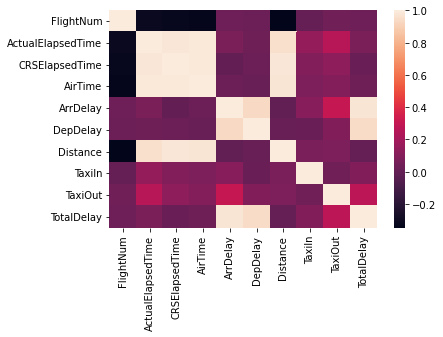

In [18]:
### Understanding the Coorelation of some of the variables - EDA step -4
df_heat = Cleaned_df.drop(columns = ['Year','Month','DayofMonth','UniqueCarrier','TailNum','Origin','Dest'])
df_heat=df_heat.drop(columns=['DepTime','CRSDepTime','ArrTime','CRSArrTime'])
sns.heatmap(df_heat.corr())

In [36]:
### Percentage of flights which arrived on time - EDA step-5
on_time = df_heat.loc[df_heat["ArrDelay"]<=0.0]
print ((on_time.shape[0])*100/df_heat.shape[0])
delayed = df_heat.loc[df_heat["ArrDelay"]>0.0]
print (delayed.shape[0]*100/df_heat.shape[0])

52.17904055724657
47.82095944275343


In [34]:
### The Mean of various attributes for each FlightNumber - EDA Step6
df_heat.groupby(['FlightNum']).mean()

,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,TotalDelay
FlightNum,,,,,,,,,
1,287.183201,290.212889,261.694424,3.588704,6.618392,2039.306300,7.354815,18.133961,10.045619
2,223.038076,225.213761,201.915832,4.204409,6.380094,1697.252505,6.259853,14.862391,8.744155
3,250.636435,253.415950,227.505082,4.186865,6.966380,1797.916341,6.604378,16.526974,10.876466
4,167.065900,168.081226,144.273563,6.010728,7.026054,1131.592337,6.180843,16.611494,9.823755
5,201.843580,202.811031,177.749548,10.358951,11.326401,1297.093128,7.106691,16.987342,15.456600
...,...,...,...,...,...,...,...,...,...
8402,145.000000,150.000000,125.000000,-7.000000,-2.000000,997.000000,6.000000,14.000000,0.000000
8403,166.000000,165.000000,149.000000,17.000000,16.000000,997.000000,9.000000,8.000000,17.000000
9002,51.000000,50.000000,19.000000,12.000000,11.000000,30.000000,5.000000,27.000000,0.000000


In [39]:
### The Min value of the attributes for each FlightNumber- EDA Step 7
df_heat.groupby(['FlightNum']).min()

,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,TotalDelay
FlightNum,,,,,,,,,
1,42.0,50.0,22.0,-60.0,-18.0,187,1.0,3.0,0.0
2,40.0,50.0,29.0,-41.0,-17.0,181,2.0,3.0,0.0
3,29.0,37.0,18.0,-58.0,-20.0,84,1.0,5.0,0.0
4,42.0,50.0,30.0,-63.0,-16.0,180,1.0,4.0,0.0
5,50.0,60.0,39.0,-71.0,-16.0,239,1.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...
8402,145.0,150.0,125.0,-7.0,-2.0,997,6.0,14.0,0.0
8403,166.0,165.0,149.0,17.0,16.0,997,9.0,8.0,17.0
9002,51.0,50.0,19.0,12.0,11.0,30,5.0,27.0,0.0


In [45]:
### The number of fligths that exactly on time - EDA step 8
zero_delay = df_heat.loc[df_heat['TotalDelay']==0.0]
print (zero_delay.shape[0])

1734536


In [48]:
### The average flight delay across dataset - EDA Step 9
avg_delay_df = df_heat.loc[df_heat["TotalDelay"]>0]
avg_delay = avg_delay_df["TotalDelay"].mean()
print (avg_delay)

55.90687004880419


In [44]:
### The number of flights that are delayed by more than 60 mins - EDA Step 10
hour_delay = df_heat.loc[df_heat['TotalDelay']>=56]

,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Distance,TaxiIn,TaxiOut,TotalDelay
26,1192,263.0,255.0,250.0,63.0,55.0,1642,5.0,8.0,63.0
35,1600,164.0,175.0,152.0,113.0,124.0,1020,3.0,9.0,113.0
36,2100,168.0,175.0,153.0,79.0,86.0,1020,6.0,9.0,79.0
39,1314,201.0,210.0,190.0,100.0,109.0,1312,2.0,9.0,100.0
41,186,44.0,50.0,35.0,292.0,298.0,192,3.0,6.0,292.0
...,...,...,...,...,...,...,...,...,...,...
2389073,1074,266.0,276.0,240.0,98.0,108.0,2092,12.0,14.0,98.0
2389165,1163,107.0,115.0,88.0,91.0,99.0,626,3.0,16.0,91.0
2389166,1164,110.0,116.0,87.0,77.0,83.0,626,6.0,17.0,77.0
2389181,1179,105.0,112.0,81.0,81.0,88.0,599,5.0,19.0,81.0
